In [ ]:
# Import required library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
import datetime as dt
from sklearn.preprocessing import LabelEncoder 
% matplotlib inline
le = LabelEncoder()

# Load dataset

In [2]:
train = pd.read_csv('train_2016_v2.csv')
pro = pd.read_csv('properties_2016.csv')
sample = pd.read_csv('sample_submission.csv')

/home/sudhir/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
print('Number of rows & columns in train data set:',train.shape)
print('Number of rows & columns in properties data set:',pro.shape)
print('Number of rows & columns in sample data set:',sample.shape)


Number of rows & columns in train data set: (90275, 3)
Number of rows & columns in properties data set: (2985217, 58)
Number of rows & columns in sample data set: (2985217, 7)


In [12]:
print(train.head(5))
print('\n')
print(train.info())

   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB
None


In [13]:
sample.head() # our target variable logerror 

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [14]:
pro.head(3).T

,0,1,2
parcelid,10754147,10759547,10843547
airconditioningtypeid,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,0,0,0
bedroomcnt,0,0,0
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN
calculatedbathnbr,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN


Looks like many missing values

In [15]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

Lets reduce the size of properties file by converting float64 into float 32

In [3]:
for c, dtype in zip(pro.columns,pro.dtypes):
    if dtype == np.float64:
        pro[c] = pro[c].astype(np.float32)

In [4]:
df= train.merge(pro,how='left',on='parcelid')
print('Number of rows & columns in df data set:',df.shape)
df.head()

Number of rows & columns in df data set: (90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13


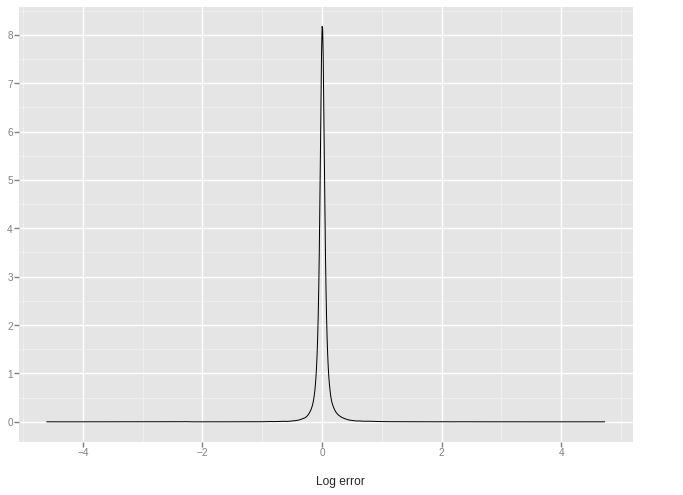

<ggplot: (8785493309602)>

In [30]:
ggplot(df,aes(x='logerror'))+\
    geom_density()+\
    labs(x='Log error')

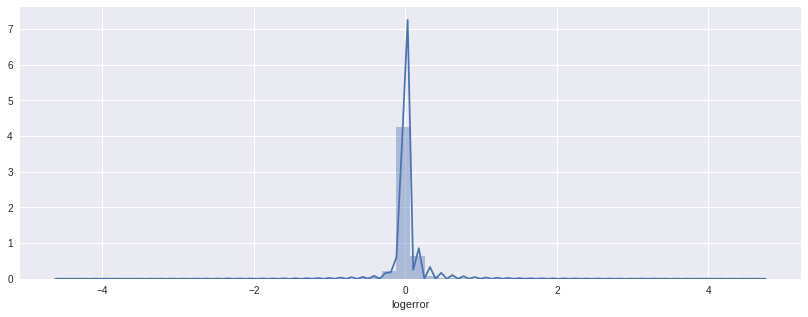

In [36]:
plt.figure(figsize=(14,5))
sns.distplot(df['logerror'])

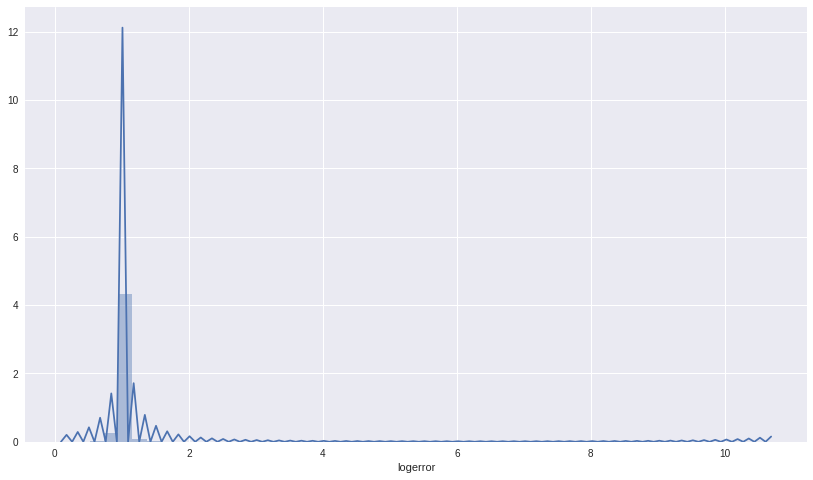

In [7]:
plt.figure(figsize=(14,8))
sns.distplot(np.sqrt(np.exp(df['logerror'])))

In [80]:
num_var = df.select_dtypes(exclude=['object']).columns
cat_var = df.select_dtypes(include=['object']).columns
cat_var

Index(['transactiondate', 'hashottuborspa', 'propertycountylandusecode',
       'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

Uni variate analysis of variable 'hashottuborspa'

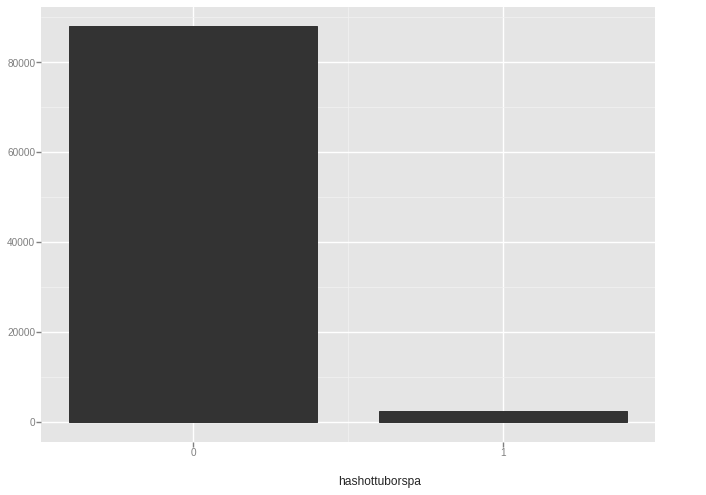

<ggplot: (-9223363243116440895)>

In [52]:
ggplot(df,aes('hashottuborspa'))+\
    geom_bar()


In [93]:
print(df['hashottuborspa'].describe())
print(df['hashottuborspa'].value_counts())
print('Na values:',df['hashottuborspa'].isnull().count())
df['hashottuborspa'].unique()

count    90275.000000
mean         0.026198
std          0.159724
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hashottuborspa, dtype: float64
0    87910
1     2365
Name: hashottuborspa, dtype: int64
Na values: 90275


array([0, 1])

lets fill 0 to 'hashottuborspa' variable

In [42]:
df['hashottuborspa'] = df['hashottuborspa'].fillna('NO')
df['hashottuborspa'] = df['hashottuborspa'].map(lambda x: 0 if x =='NO' else 1)

Univariate analysis of 'propertycountylandusecode'

In [92]:
print(df['propertycountylandusecode'].value_counts())
print('\n')
print('Number of NaN values:', df['propertycountylandusecode'].isnull().count())
df['propertycountylandusecode'].unique()

0100    30846
122     15383
010C    10264
0101     7435
34       5946
1111     3883
1        2915
010E     2286
010D     2209
0200     2153
1129     1643
1110     1117
0400      747
0300      578
012C      523
1128      356
0104      348
01DC      251
010V      201
01HC      148
38        106
96        104
0103      100
010G       80
010H       72
010M       59
0700       54
1210       47
0108       46
1117       46
        ...  
012D        4
0110        4
105         4
1310        4
0102        3
1011        2
1432        2
1012        2
1421        2
030G        2
1420        1
200         1
0303        1
1200        1
0131        1
6050        1
020M        1
01DD        1
0301        1
1333        1
0130        1
010         1
8800        1
040A        1
0114        1
0           1
1722        1
0210        1
0111        1
0           1
Name: propertycountylandusecode, Length: 78, dtype: int64


Number of NaN values: 90275


array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
       '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
       '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
       '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
       '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
       '1720', '1011', '1432', '0401', '0102', '012D', '73', '105', '0110',
       '100V', '0130', '8800', '0303', '0210', '1012', '1333', '0114',
       '01DD', '020G', '040A', '012E', '020M', '040V', '070D', '1200',
       '030G', '1722', '6050', '1421', '010', 0, '200', '0', '1420',
       '0131', '0301'], dtype=object)

for 'propertycountylandusecode' nan values ww will fill with 0

In [101]:
df['propertycountylandusecode'].fillna('0100',inplace=True)
#pd.Categorical(df['propertycountylandusecode'])
#le.fit_transform(pd.Categorical(df['propertycountylandusecode']))

In [102]:
le.fit_transform(pd.Categorical(df['propertycountylandusecode'].astype('category')))

TypeError: '>' not supported between instances of 'int' and 'str'

In [85]:
df['propertycountylandusecode'].describe()

count     90275
unique       78
top        0100
freq      30846
Name: propertycountylandusecode, dtype: object

In [89]:
print(df['propertyzoningdesc'].describe())
print(df['propertyzoningdesc'].value_counts())

count     58313
unique     1996
top        LAR1
freq       7678
Name: propertyzoningdesc, dtype: object
LAR1          7678
LAR3          2801
LARS          1503
LBR1N         1459
LARD1.5       1305
LAR2          1287
SCUR2         1104
LARD2          963
LARA           851
LARE11         716
LARE15         617
TORR-LO        616
LCR1YY         530
LAR4           505
SCUR3          492
PSR6           441
LARD3          427
LKR1YY         401
GLR1YY         337
PDR1*          328
LCA11*         325
LCR1*          311
LAC2           306
LCA22*         306
LCA25*         288
BUR1YY         283
LCA106         278
LCA21*         278
CORL*          265
LBR2N          265
              ... 
PRR1*            1
POC4-R3200       1
HAR1             1
IRM2             1
EMR1CY           1
BFR105000        1
SGR4*            1
CVRD3900*        1
LYM*             1
SOR12000*        1
LCR3P            1
RPRS10000S       1
SDA11*           1
LCA110*          1
TOHC-GEN         1
LCA10000*        1
ARR

In [103]:
le.fit_transform(df['propertyzoningdesc'])

TypeError: '>' not supported between instances of 'str' and 'float'

In [ ]:
Uni variate analysis of 'fireplaceflag'

In [111]:
print(df['fireplaceflag'].value_counts())
print(df['fireplaceflag'].isnull().count())

1    90275
Name: fireplaceflag, dtype: int64
90275


In [110]:
df['fireplaceflag'].fillna('No',inplace=True)
df['fireplaceflag'] = df['fireplaceflag'].map(lambda x: 0 if x=='No' else 1)
df['fireplaceflag']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
90245    1
90246    1
90247    1
90248    1
90249    1
90250    1
90251    1
90252    1
90253    1
90254    1
90255    1
90256    1
90257    1
90258    1
90259    1
90260    1
90261    1
90262    1
90263    1
90264    1
90265    1
90266    1
90267    1
90268    1
90269    1
90270    1
90271    1
90272    1
90273    1
90274    1
Name: fireplaceflag, Length: 90275, dtype: int64

In [115]:
print(df['taxdelinquencyflag'].value_counts())
print(df['taxdelinquencyflag'].isnull().count())

Y    1783
Name: taxdelinquencyflag, dtype: int64
90275
